# Import Arrays from fpnb.py

In [90]:
import import_ipynb
from fpnb import rads_earthed
from fpnb import mass

# Import Other Libraries

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Fitting

Rearrange the order of radius and mass to make radiuses have an increasing order.

In [112]:
list1, list2 = zip(*sorted(zip(rads_earthed, mass)))
r = np.array(list1)
m = np.array(list2)

Perform fitting

In [131]:
# spline fit
s = interp1d(r, m)
# ployfit
order = 2
p = np.poly1d(np.polyfit(r, m, order))

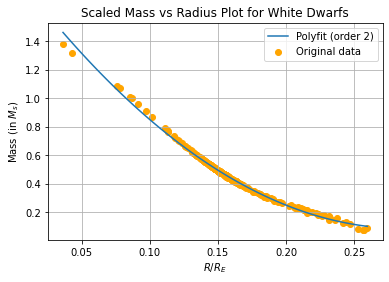

In [132]:
xnew = np.linspace(min(r), max(r), num=100, endpoint=True)
plt.figure()
plt.scatter(r,m, label = "Original data", facecolor='orange')
#plt.plot(xnew, s(xnew))
plt.plot(xnew, p(xnew), label = "Polyfit (order " + str(order) +")")

plt.xlabel("$R/R_E$")
plt.ylabel("Mass (in $M_s$)")
plt.title("Scaled Mass vs Radius Plot for White Dwarfs")
plt.grid(); plt.legend();